In [33]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments** 

## Introducing and exploring the dataset

The dataset is located in `../data/bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

Columns summary  : 

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| balance | average yearly balance, in euros  |
| housing | has housing loan? |
| loan | has personal loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [34]:
import pandas as pd

Create a dataframe with the dataset `../data/bank-full.csv`

In [35]:
df = pd.read_csv('../data/bank-full.csv', sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Describe the dataset informations

In [36]:
print(df.shape)
print(df.info())
df.describe()

(45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Use histogramms to display the features' distribution

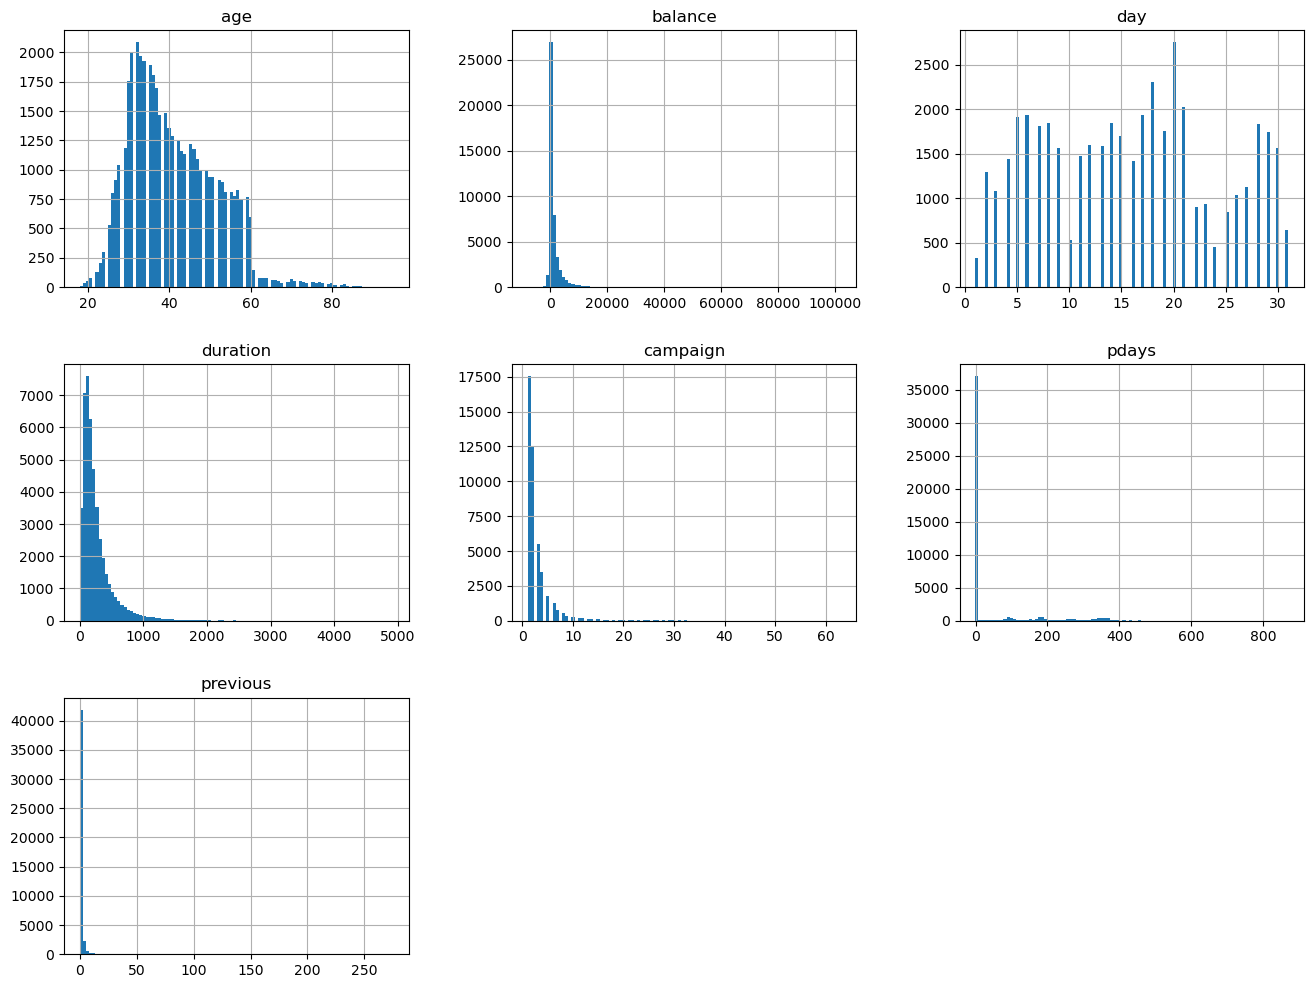

In [37]:
rcParams['figure.figsize'] = 16,12
plots = df.hist(bins=100)

In [38]:
#distribution log-normale (duration)

Use heatmap to display the numerical features' correlation

In [39]:
from sklearn.compose import make_column_selector

numerical_features = make_column_selector(dtype_include=np.number)
numerical_columns = numerical_features(df)
numerical_df = df[numerical_columns]

correlation_matrix = numerical_df.corr()

In [40]:
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


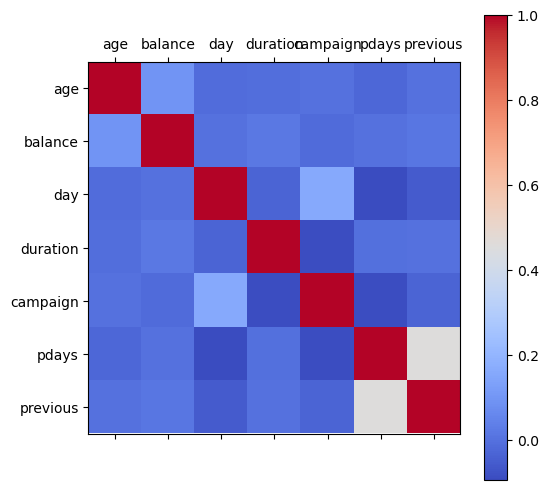

In [41]:
#Plot option 1: Matplotlib
rcParams['figure.figsize'] = 10, 6
plt.matshow(numerical_df.corr(), cmap='coolwarm')
plt.yticks(np.arange(numerical_df.shape[1]), numerical_df.columns)
plt.xticks(np.arange(numerical_df.shape[1]), numerical_df.columns)
plt.colorbar()

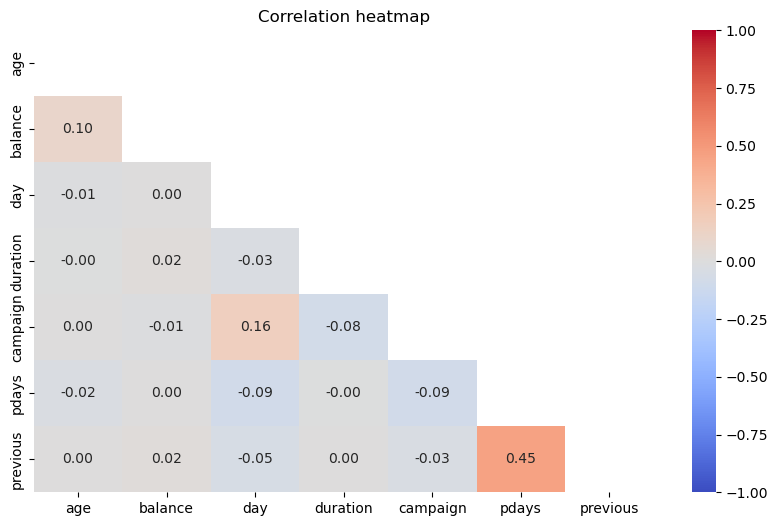

In [42]:
#Plot option 2: Seaborn

import seaborn as sns

numerical_df_corr = numerical_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(numerical_df_corr, annot=True,
             cmap='coolwarm', 
             fmt='.2f',
             vmin=-1, 
             vmax=1,
             mask=np.triu(numerical_df_corr.corr())
             )

plt.title("Correlation heatmap")
plt.show()

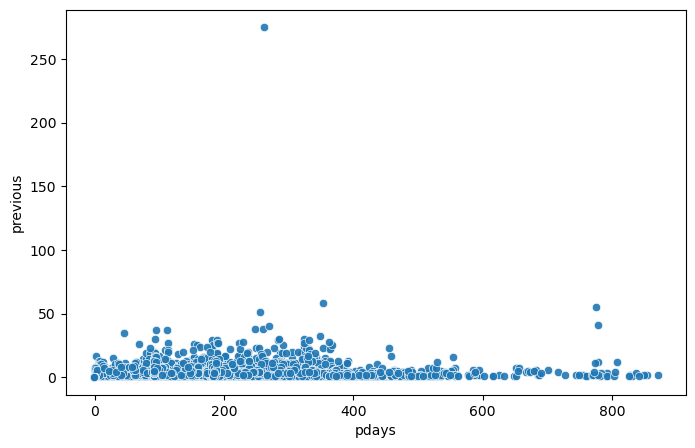

In [43]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x='pdays', y='previous', data=numerical_df, alpha=0.9)
plt.show()

In [44]:
numerical_df

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


The date is a strange type of data for machine learning. Think about it. Is the day? the month? the year that are important? Or the relative date for instance in the year?

If the phenomenon occurs seasonally, maybe it is better to look at the day of the year (on 365 days), if it monthly, maybe to look at the day in the month (on approximativally 30, 31 or other for bissextile year), etc... If more complex, well do the propoer hypothesis and test it.

For our problem, we supposed it is better to look at the day of the year. Maybe is good, maybe is wrong. It is an hypothesis we want you to test. So in order to continue the preprocessing, the features `day` and `month` should be merged into one column named `dayoftheyear`.

You can use pandas datetime tools or python datetime librairies for doing this preprocessing.
(the default year used will be 1984)

In [45]:
df['date'] = df['day'].astype(str) + '-' + df['month']
#df['date'].info
df['date'] = pd.to_datetime(df['date'], format='%d-%b')
df['dayoftheyear'] = df['date'].dt.dayofyear
#df['dayoftheyear']

In [46]:
df_clean = df
df_clean

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,date,dayoftheyear
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1900-05-05,125
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1900-05-05,125
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1900-05-05,125
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1900-05-05,125
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1900-05-05,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1900-11-17,321
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1900-11-17,321
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1900-11-17,321
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,1900-11-17,321


In [47]:
#Method 1: Datawrangler

# def clean_data(df_clean):
#     # One-hot encode columns: 'housing', 'loan'
#     df_clean = pd.get_dummies(df_clean, columns=['housing', 'loan'])
#     # Drop columns: 'contact', 'date' and 2 other columns
#     df_clean = df_clean.drop(columns=['contact', 'date', 'day', 'month'])
#     return df_clean

# df_clean_1 = clean_data(df_clean.copy())
# df_clean_1.head()

In [48]:
#Method 2: Manually

df_clean = df_clean.drop(['day','month','duration', 'date'], axis=1)
df_clean


,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,dayoftheyear
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,no,125
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,0,unknown,no,125
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,no,125
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,0,unknown,no,125
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,0,unknown,no,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,3,-1,0,unknown,yes,321
45207,71,retired,divorced,primary,no,1729,no,no,cellular,2,-1,0,unknown,yes,321
45208,72,retired,married,secondary,no,5715,no,no,cellular,5,184,3,success,yes,321
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,4,-1,0,unknown,no,321


We cannot treat the same way categories with numerical features. So let's make two different lists and different treatments. Now sort the features into categorical and numerical features

In [49]:
# Method1: Ne marche pas si l'on souhaite renomer les colonnes après la pipeline

#  #categorical_features = [] # to be completed
# categorical_features = make_column_selector(dtype_exclude=np.number)

# #numerical_features = [] # to be completed
# numerical_features = make_column_selector(dtype_include=np.number)


In [50]:
# Method2: Manually
 
categorical_features = ['job', 'marital', 'education', 'default', 
                        'housing', 'loan', 'contact', 'poutcome'] 
numerical_features = ['age', 'balance', 'campaign', 'pdays', 'previous', 'dayoftheyear'] 

After a first exploration, categorical/ordinal features (10 columns) need to be encoded in order to become a valid input for the modeling phase. ML manipulates figures, not string, not category by itself.

Look at the encoder to *encode* your *categorical data*. The different encoders can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

(You can also use the function `get_dummies` of pandas for categorical features)

In [51]:
# Create the X and y DataFrames resample the dataframes if necessary
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder

y = df_clean['y']
X = df_clean.drop('y', axis = 1)

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [52]:
unique_y_train, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique_y_train, counts)).T)
unique_y_test, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique_y_test, counts)).T)

[[    0 31937]
 [    1  4231]]
[[   0 7985]
 [   1 1058]]


In [53]:
# import and create the appropriate encoders 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_pipeline = make_pipeline(StandardScaler())
categorical_pipeline = make_pipeline(OneHotEncoder())

pipeline = ColumnTransformer(
    transformers = [
         ("categorical", categorical_pipeline, categorical_features), 
         ("numerical", numerical_pipeline, numerical_features)
    ]) 

X_train_pipe = pipeline.fit_transform(X_train)
X_test_pipe = pipeline.transform(X_test)


In [54]:
#Converting from Numpy array to Pandas

col_names = pipeline.get_feature_names_out()

X_train_pipe = pd.DataFrame(X_train_pipe, columns=col_names)
X_test_pipe = pd.DataFrame(X_test_pipe, columns=col_names)

In [55]:
X_train_pipe

,categorical__job_admin.,categorical__job_blue-collar,categorical__job_entrepreneur,categorical__job_housemaid,categorical__job_management,categorical__job_retired,categorical__job_self-employed,categorical__job_services,categorical__job_student,categorical__job_technician,...,categorical__poutcome_failure,categorical__poutcome_other,categorical__poutcome_success,categorical__poutcome_unknown,numerical__age,numerical__balance,numerical__campaign,numerical__pdays,numerical__previous,numerical__dayoftheyear
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,-0.460434,-0.164410,-0.246104,-0.410910,-0.241509,0.939734
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,-1.589641,0.899627,0.398202,1.446096,2.664584,-1.022539
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.292371,-0.365486,0.398202,-0.410910,-0.241509,0.711250
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.668773,-0.445003,2.653271,-0.410910,-0.241509,0.549967
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,-0.272233,-0.361249,2.331118,-0.410910,-0.241509,0.899413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.856974,-0.146160,-0.246104,-0.410910,-0.241509,0.536527
36164,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.460434,-0.437834,0.720354,-0.410910,-0.241509,0.429005
36165,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.386471,-0.419258,-0.568256,-0.410910,-0.241509,0.469326
36166,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.307339,0.388954,-0.568256,-0.410910,-0.241509,-0.605892


In [56]:
X_test_pipe

,categorical__job_admin.,categorical__job_blue-collar,categorical__job_entrepreneur,categorical__job_housemaid,categorical__job_management,categorical__job_retired,categorical__job_self-employed,categorical__job_services,categorical__job_student,categorical__job_technician,...,categorical__poutcome_failure,categorical__poutcome_other,categorical__poutcome_success,categorical__poutcome_unknown,numerical__age,numerical__balance,numerical__campaign,numerical__pdays,numerical__previous,numerical__dayoftheyear
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.084032,-0.236433,-0.246104,-0.410910,-0.241509,-0.579012
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.292371,-0.321816,-0.246104,-0.410910,-0.241509,-0.283327
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.930937,-0.328986,0.720354,-0.410910,-0.241509,-0.001082
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.460434,-0.231544,0.398202,-0.410910,-0.241509,-0.377408
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.648635,0.181035,-0.568256,-0.410910,-0.241509,-1.828953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.401440,-0.553525,-0.568256,-0.410910,-0.241509,0.187081
9039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.762873,-0.156915,0.076049,-0.410910,-0.241509,0.240842
9040,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.836836,-0.130843,-0.246104,-0.410910,-0.241509,0.429005
9041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,-1.966043,-0.445003,0.398202,1.416144,1.419116,1.813349


Now, the dataset needs to be split into two sets :
1. one corresponding to $ŷ$ 
2. the other corresponding to the $X$ matrix.

- Prepare the learning dataset

At the end of this part, two dataframes are created :

- `X` containing the features (or the matrix $X$)
- `y` containing the label (or $ŷ$)

Display the shape of X and y

In [57]:
print(f'X_train:', X_train_pipe.shape)
print(f'y_train:', len(y_train))
print(f'X_test:', X_test_pipe.shape)
print(f'y_test:', len(y_test))

X_train: (36168, 38)
y_train: 36168
X_test: (9043, 38)
y_test: 9043


Well done! The data is now ready to be splitted into sets and used to train models!

Hop hop hop!!! Not to fast!! You processed the data for machine learning, but are all the data useful?  
As an expert, I tell you you should removed the duration column!!

Could you tell me why?

💡*think first, but if you have no idea double click here.*
<!-- When do your calls last the most? --> 

In [58]:
X_train_pipe.columns

Index(['categorical__job_admin.', 'categorical__job_blue-collar',
       'categorical__job_entrepreneur', 'categorical__job_housemaid',
       'categorical__job_management', 'categorical__job_retired',
       'categorical__job_self-employed', 'categorical__job_services',
       'categorical__job_student', 'categorical__job_technician',
       'categorical__job_unemployed', 'categorical__job_unknown',
       'categorical__marital_divorced', 'categorical__marital_married',
       'categorical__marital_single', 'categorical__education_primary',
       'categorical__education_secondary', 'categorical__education_tertiary',
       'categorical__education_unknown', 'categorical__default_no',
       'categorical__default_yes', 'categorical__housing_no',
       'categorical__housing_yes', 'categorical__loan_no',
       'categorical__loan_yes', 'categorical__contact_cellular',
       'categorical__contact_telephone', 'categorical__contact_unknown',
       'categorical__poutcome_failure', 'catego

In [59]:
# remove duration column

# Did not use this variable when selecting categorical and numerical features 

## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss. In other word, it wants a pipeline easy to use and evaluate.
2. A model, that performs well.

Before beginning the modelling phase let's split the dataset into one training set and one testing set.

In [60]:
# from sklearn.model_selection import StratifiedShuffleSplit 

# splitter=StratifiedShuffleSplit(n_splits=1,random_state=42) 

# for train,test in splitter.split(X,y): 
#     X_train_Strat = X.iloc[train]
#     y_train_Strat = y.iloc[train]
#     X_test_Strat = X.iloc[test]
#     y_test_Strat = y.iloc[test]
# print(y_train_Strat.value_counts())
# print(f'y_train:', y_train_Strat.shape)
# print(y_test_Strat.value_counts())
# print(f'y_test:', y_test_Strat.shape)


### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Training the Decision Tree model with various splits of the dataset (change the `seed` parameter of the `train_test_split` function for obtaining the second dataset)
* The decision tree `max_depth` will be fixed at 3 first

if you need more info you can take a look at the [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

In [61]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train_pipe, y_train)
clf.score(X_train_pipe, y_train)

0.893607608936076

Now, a first model has been created, change the random seed for the train/test split, and create another tree.

This tree should be created with the same hyperparameters than above. 

In [63]:
# create a new train and test dataset with a different seed
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

X_train_pipe2 = pipeline.fit_transform(X_train2)
X_train_pipe2

X_test_pipe2 = pipeline.transform(X_test2)
X_test_pipe2

array([[ 0.        ,  0.        ,  0.        , ..., -0.41032984,
        -0.24390099,  0.84376277],
       [ 0.        ,  0.        ,  0.        , ..., -0.41032984,
        -0.24390099, -0.31110572],
       [ 0.        ,  0.        ,  0.        , ..., -0.41032984,
        -0.24390099,  1.47491182],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.41032984,
        -0.24390099,  0.91090628],
       [ 0.        ,  1.        ,  0.        , ..., -0.41032984,
        -0.24390099, -0.59310849],
       [ 0.        ,  0.        ,  0.        , ..., -0.41032984,
        -0.24390099, -0.37824924]])

In [64]:
# Second tree creation

clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train_pipe2, y_train)
clf.score(X_train_pipe2, y_train)

0.8832946250829462

In [65]:
predictions = clf.predict(X_test_pipe2)

In [66]:
np.unique(predictions, return_counts=True)

(array([0, 1]), array([9041,    2], dtype=int64))

What can you tell about the two trees?

*answer here*: 
>>>Although very similar, performance observed for each model differs slightly 

Normally, before creating a model, one or more evaluation metrics should be chosen depending of the client problem.

* Choose different metrics that seem relevant to this problem (see previous lesson on Classification)

* Prepare a scoring list for these metrics.

* Use the cross-validation method to measure these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)). 

*Hint:*  the `cross_validate` method allows you to pass a metric list as parameter (see [doc here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) ).

In [67]:
# Check balance of target variable
df_clean['y'].unique(), df_clean['y'].value_counts()

(array(['no', 'yes'], dtype=object),
 y
 no     39922
 yes     5289
 Name: count, dtype: int64)

In [68]:
# Very unbalanced dataset

In [83]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score

accuracy_score = cross_val_score(clf, X_train_pipe, y_train, cv=5, scoring='accuracy')
print(f'Accuracy scores are:{accuracy_score}')

precision_score = cross_val_score(clf, X_train_pipe, y_train, cv=5, scoring='precision')
print(f'Precicion scores are:{precision_score}')

f1_score = cross_val_score(clf, X_train_pipe, y_train, cv=5, scoring='f1')
print(f'f1_score scores are:{f1_score}')

recall_score = cross_val_score(clf, X_train_pipe, y_train, cv=5, scoring='recall')
print(f'Recall_scores are:{recall_score}')


Accuracy scores are:[0.89189936 0.89093171 0.89300525 0.89216093 0.89340523]
Precicion scores are:[0.61267606 0.66666667 0.64313725 0.65277778 0.65822785]
f1_score scores are:[0.30769231 0.22418879 0.29764065 0.26553672 0.28808864]
Recall_scores are:[0.20567376 0.13475177 0.19362456 0.16666667 0.18439716]


Now process the output of your cross-validation in order to know the diversity in performances and the average performance

In [87]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision', 'recall', 'f1']
scores = cross_validate(clf, X_train_pipe, y_train, cv=5, scoring=scoring)
scores


{'fit_time': array([0.22328329, 0.14467716, 0.13003135, 0.14973807, 0.17562652]),
 'score_time': array([0.0244503 , 0.01554012, 0.02004075, 0.03235745, 0.02473211]),
 'test_accuracy': array([0.89176113, 0.89093171, 0.89300525, 0.89216093, 0.89340523]),
 'test_precision': array([0.61052632, 0.66666667, 0.64313725, 0.65277778, 0.65822785]),
 'test_recall': array([0.20567376, 0.13475177, 0.19362456, 0.16666667, 0.18439716]),
 'test_f1': array([0.30769231, 0.22418879, 0.29764065, 0.26553672, 0.28808864])}

Plot your metrics performance

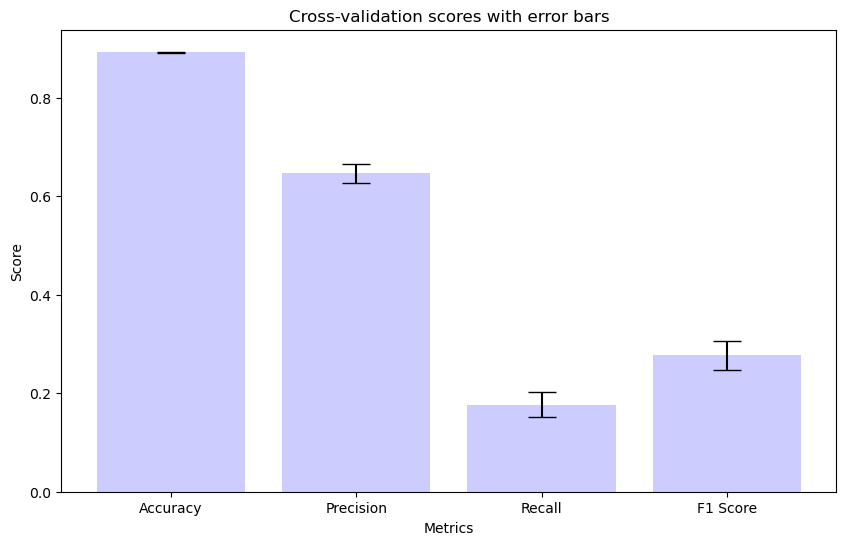

In [89]:
#Plot metrics performance

import matplotlib.pyplot as plt

# Extract the test scores for each metric
accuracy_scores = scores['test_accuracy']
precision_scores = scores['test_precision']
recall_scores = scores['test_recall']
f1_scores = scores['test_f1']

mean_scores = [accuracy_scores.mean(), precision_scores.mean(), recall_scores.mean(), f1_scores.mean()]

std_scores = [accuracy_scores.std(), precision_scores.std(), recall_scores.std(), f1_scores.std()]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.bar(metrics, mean_scores, yerr=std_scores, alpha=0.2, color='blue', align='center', capsize=10)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Cross-validation')
plt.show()


Now choose a single metric to perform a grid search on the `max_depth` of the tree.

In [91]:
# Grid search

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_pipe, y_train)

print(f'Best params (accuracy score): {grid_search.best_params_}')

print(f'Best Score (accuracy score): {grid_search.best_score_}')


Best params (accuracy score): {'max_depth': 3}
Best Score (accuracy score): 0.8929440644305252


Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [92]:
# Test metrics

from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train_pipe, y_train)
y_pred = clf.predict(X_test_pipe)
accuracy_score(y_test, y_pred)



0.8930664602454937

What are your observation?  
By looking at the metric results, what is strange? Or at the opposite, obvious?

From theses observations, what are your conclusions?  
In the next sessions, we will look at ensembling to improve performances. But what should you be suspicious? What are the potential risks you identified?  

Propose something, continue to the next section and change your conclusions if you need.

### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach! 

Bagging stands for ***Boostrap AGGregatING***.

The following [post](https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/) will give you an overview of these methods and their advantages and drawbacks

**The train test split using a seed equals to 42 will be used in the following part**

In [ ]:
# train_test split (you can copy paste the previously declared cell)
# X_train, X_test, y_train, y_test = None

#### Using Random Forest

The concept of random forest is explained in this [post](https://medium.com/analytics-vidhya/understanding-the-random-forest-algorithm-79b87bdde79a).

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` and `max_depth` parameters. 

In [ ]:
# gridsearch for the Random Forest classifier
#

How much estimators should we use for obtaining an optimal result? (in terms of time and performance)

*answer here*

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [ ]:
# Test metrics

#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :

In [ ]:
# training and display features' importance.
# tell them to use the RandomForest Object

What is the most important feature?

*Answer here*

A lot of features have low importance and probably add noise which reduce the performance of the classifier, do a feature selection by recursive elemination to automatically select the subset of features that gives you the best model predictions.

You can have a look at : 

https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [ ]:
# Feature selection with recursive elimination
# Do another grid search on your model with the subset of selected features

We removed the duration feature in our dataset

Read this feature description on the dataset description ([here on data.world](https://data.world/uci/bank-marketing) or [here on kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)).

How would the previously trained models perform with this feature?

*Answer here*

### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install the `xgboost` package

*Read the articles in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

In [ ]:
# use the same split and seed than you used before
# normally, you have nothing to code here :D 

*Hint:* An example for integrating `XGBoost` with  the `sklearn` tools is available [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [ ]:
import xgboost as xgb

Let's build a new model than before with a grid search on the `n_estimators` and `max_depth` parameters.

In [ ]:
# model building and evaluation

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [ ]:
# Test metrics

In [ ]:
# performance curves

## Let's Conclude

Report your test set metrics for the three methods here

In [ ]:
# Decision Tree on test set

In [ ]:
# Random forest on test set

In [ ]:
# XGBoost on test set

What do you notice? What are you real conclusion about the dataset? What should you tell the client about the dataset and his problem?

*answer here*

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why? Which precautions?

you can add your models result visualization in this cell if it helps you explaining your conclusions.

                                 `write memo here`

## To go further

### Build a customized bagging classifier (Optional) 

- Use a different classification model you have seen until now and build a new classifier based on the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) to create and train an new model.
- Use differents classification models and use the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) to create and train an new model.

In [ ]:
# Write your code here

## Rebalance the data if you haven't done it yet

Before going through the modelling phase, let's see the label distribution :

Use the `value_counts` function and the appropriate visualization for displaying the label distribution

In [ ]:
# code here

What do you notice?

*answer here*

The easiest way to rebalance your data is to add the `class_weight='balanced'` parameter to your scikit learn model. The `class_weight` parameter is available in most scikit-learn models, for example look at the Decision Trees doc :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

(There are other techniques for rebalancing the data [here](https://blog.octo.com/donnees-desequilibrees-que-faire/), [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) ).

Rebalance the data with the `class_weight` parameter, and you'll have much better f1 and Average Precision metrics.

In [ ]:
# code here